# Zillow EDA On Missing Values & Multicollinearity

### Topics
- Missing Value Analysis
- Correlation Analysis
- Top Contributing Features (Through XGBoost)
- Correlation Analysis 
- Multicollinearity Analysis
- Univariate Analysis 
- Bivariate Analysis

### Global Imports

In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading In Dataset

In [2]:
train = pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('properties_2016.csv')

### Shape Of The Dataset

In [3]:
print("Shape Of Train: ", train.shape)
print("Shape Of Properties: ", properties.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)


In [4]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


### Lets Merge Train And Properties To Facilitate EDA

In [6]:
# merge() -> 두 dataframe을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할 때 사용
merged = pd.merge(train, properties, on="parcelid", how="left")

In [7]:
merged.shape # parcelid column 겹침

(90275, 60)

### First Few Rows Of Data

In [8]:
merged.head(3).transpose()

,0,1,2
parcelid,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
airconditioningtypeid,1.0,NaN,1.0
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,2.0,3.5,3.0
bedroomcnt,3.0,4.0,2.0
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,4.0,NaN,4.0


### Visualizing Datatypes

[Text(0.5, 0, 'Variable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

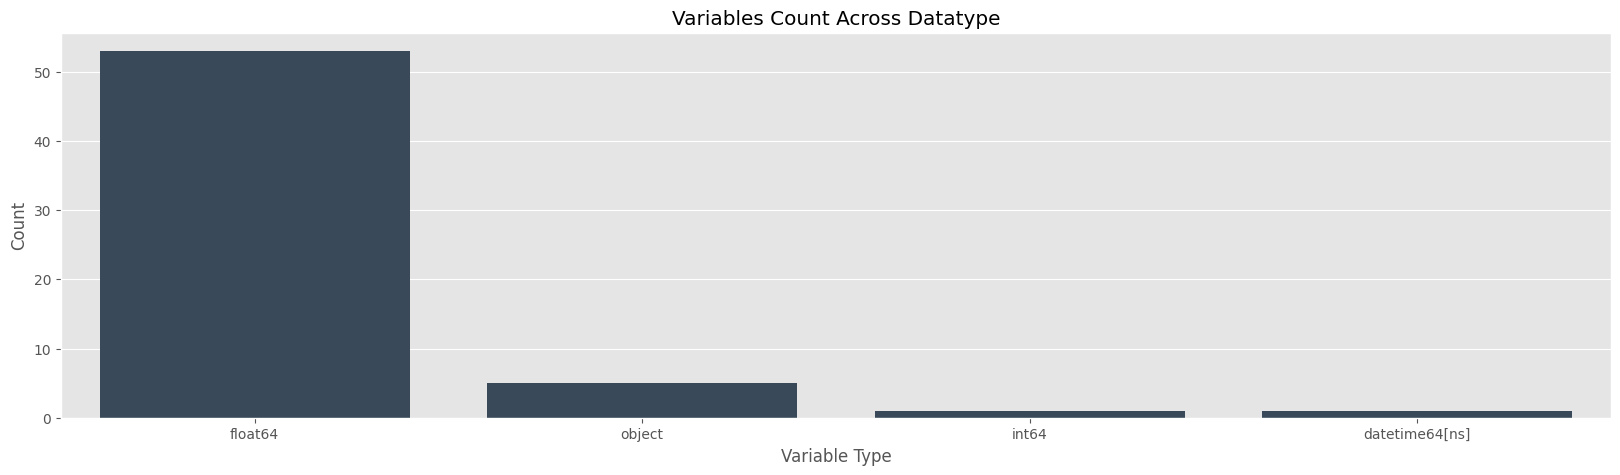

In [9]:
dataTypeDf = pd.DataFrame(merged.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf, x="variableType", y="count", ax=ax, color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count', title="Variables Count Across Datatype")

In [42]:
dataTypeDf

,variableType,count
0,float64,53
1,object,5
2,int64,1
3,datetime64[ns],1


### Missing Value Analysis

<Axes: >

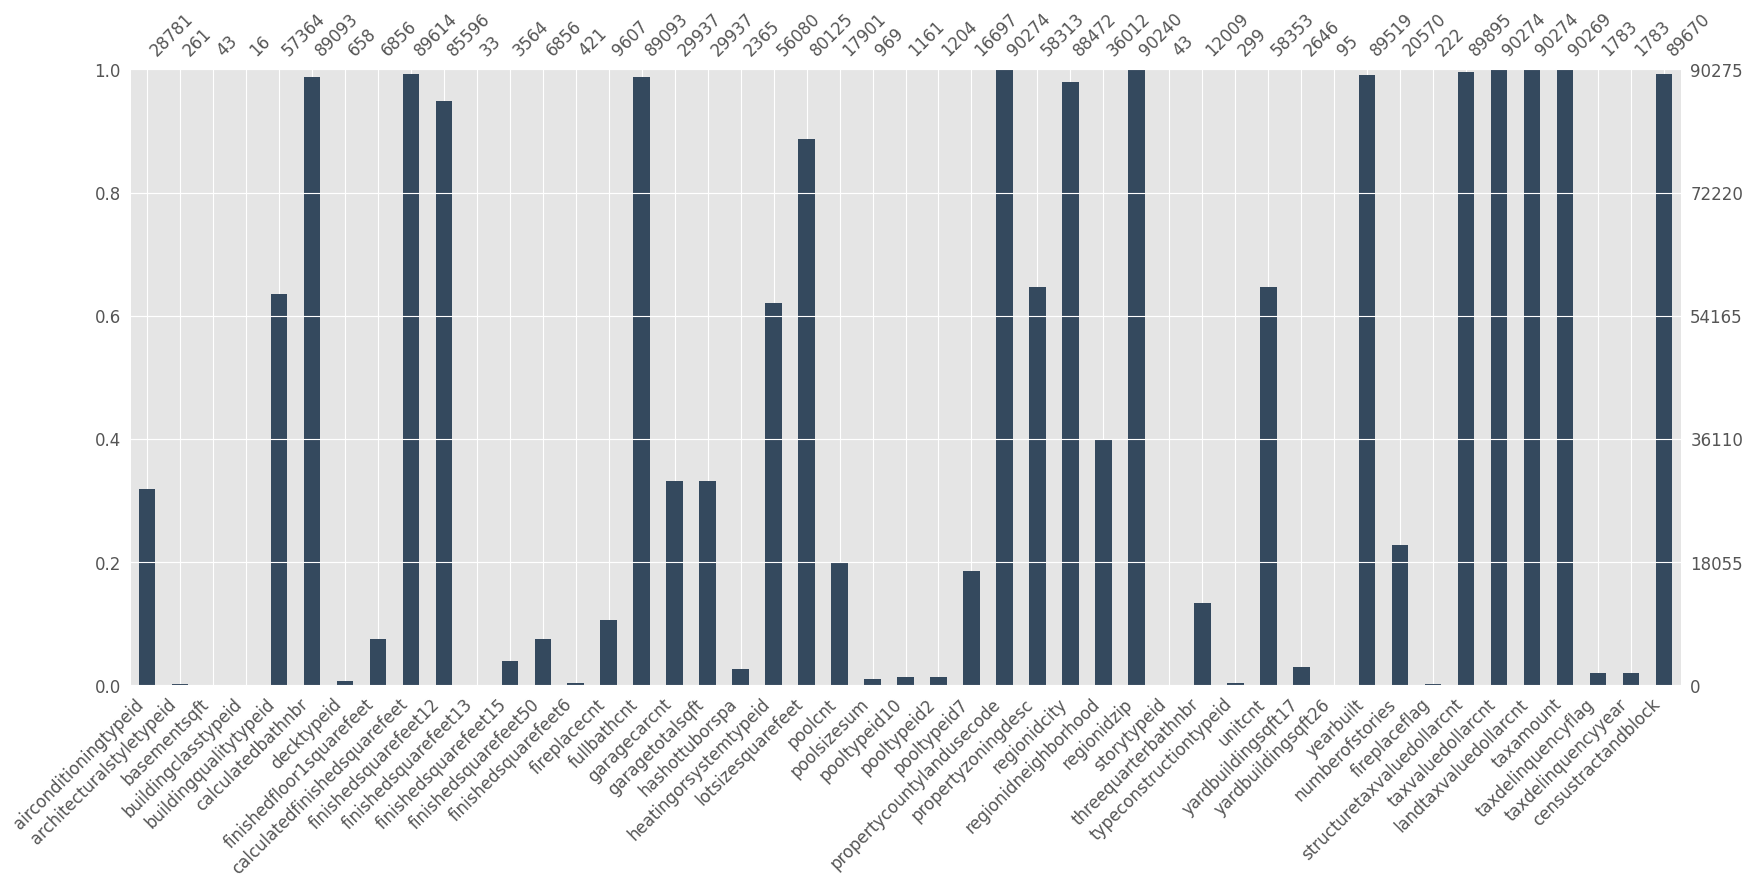

In [10]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
        figsize=(20,8), color="#34495e", fontsize=12, labels=True,)

In [47]:
merged.isnull().any() # NaN값이 1개라도 존재하는지

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                            False
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude    

In [46]:
print(len(missingValueColumns))
missingValueColumns

47


['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'regionidcity',
 'regionidneighborhood',
 'regionidzip',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'censustracta

<Axes: >

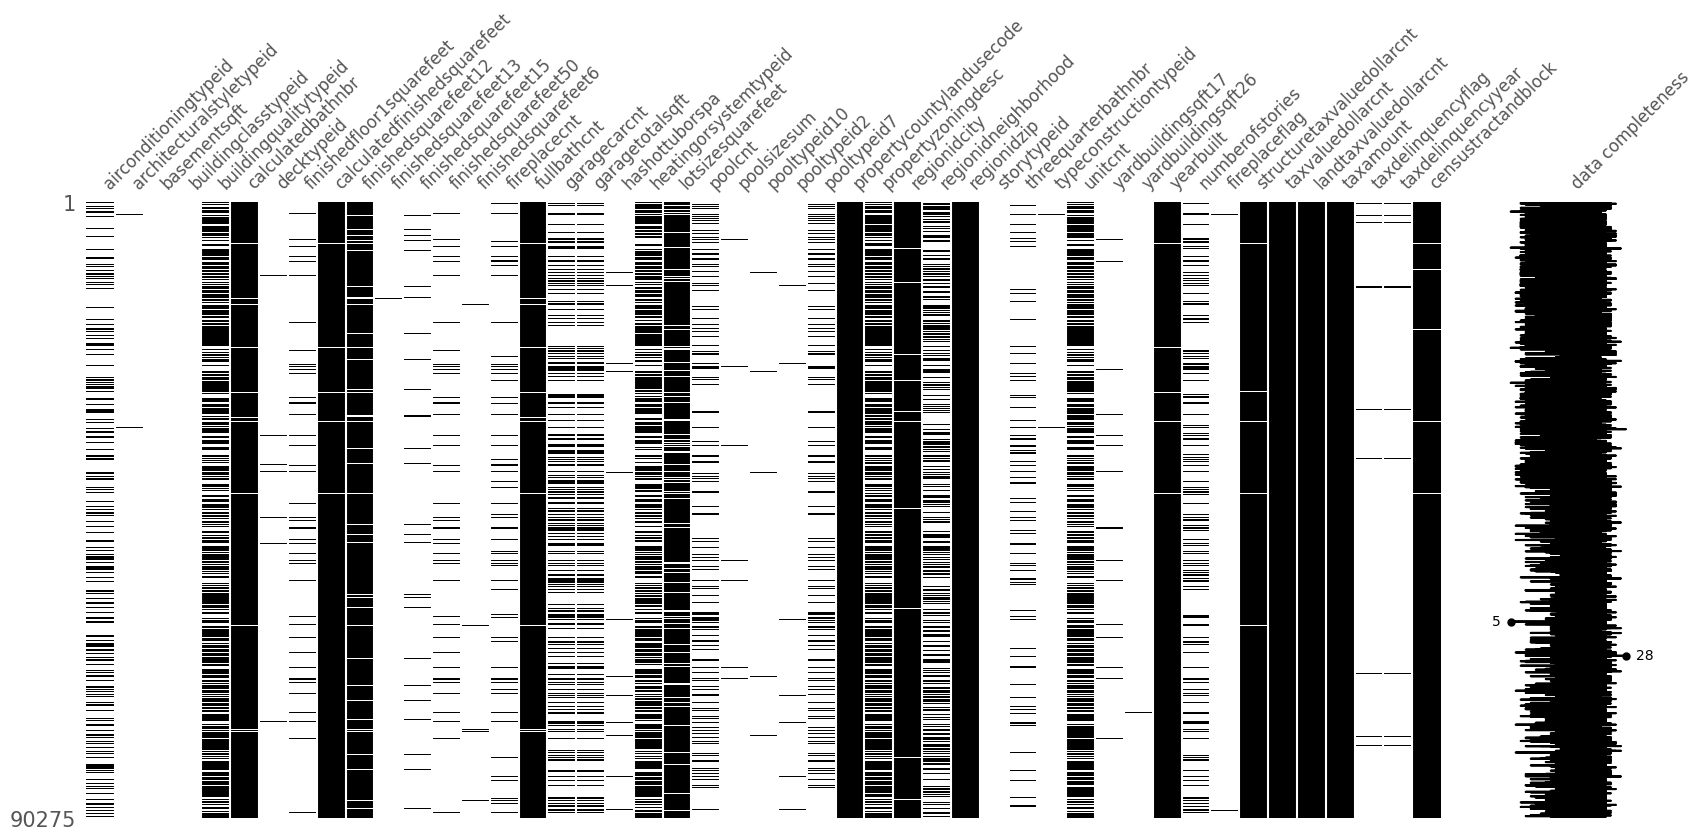

In [11]:
msno.matrix(merged[missingValueColumns], width_ratios=(10,1),\
           figsize=(20,8), color=(0, 0, 0), fontsize=12, sparkline=True, labels=True)

<Axes: >

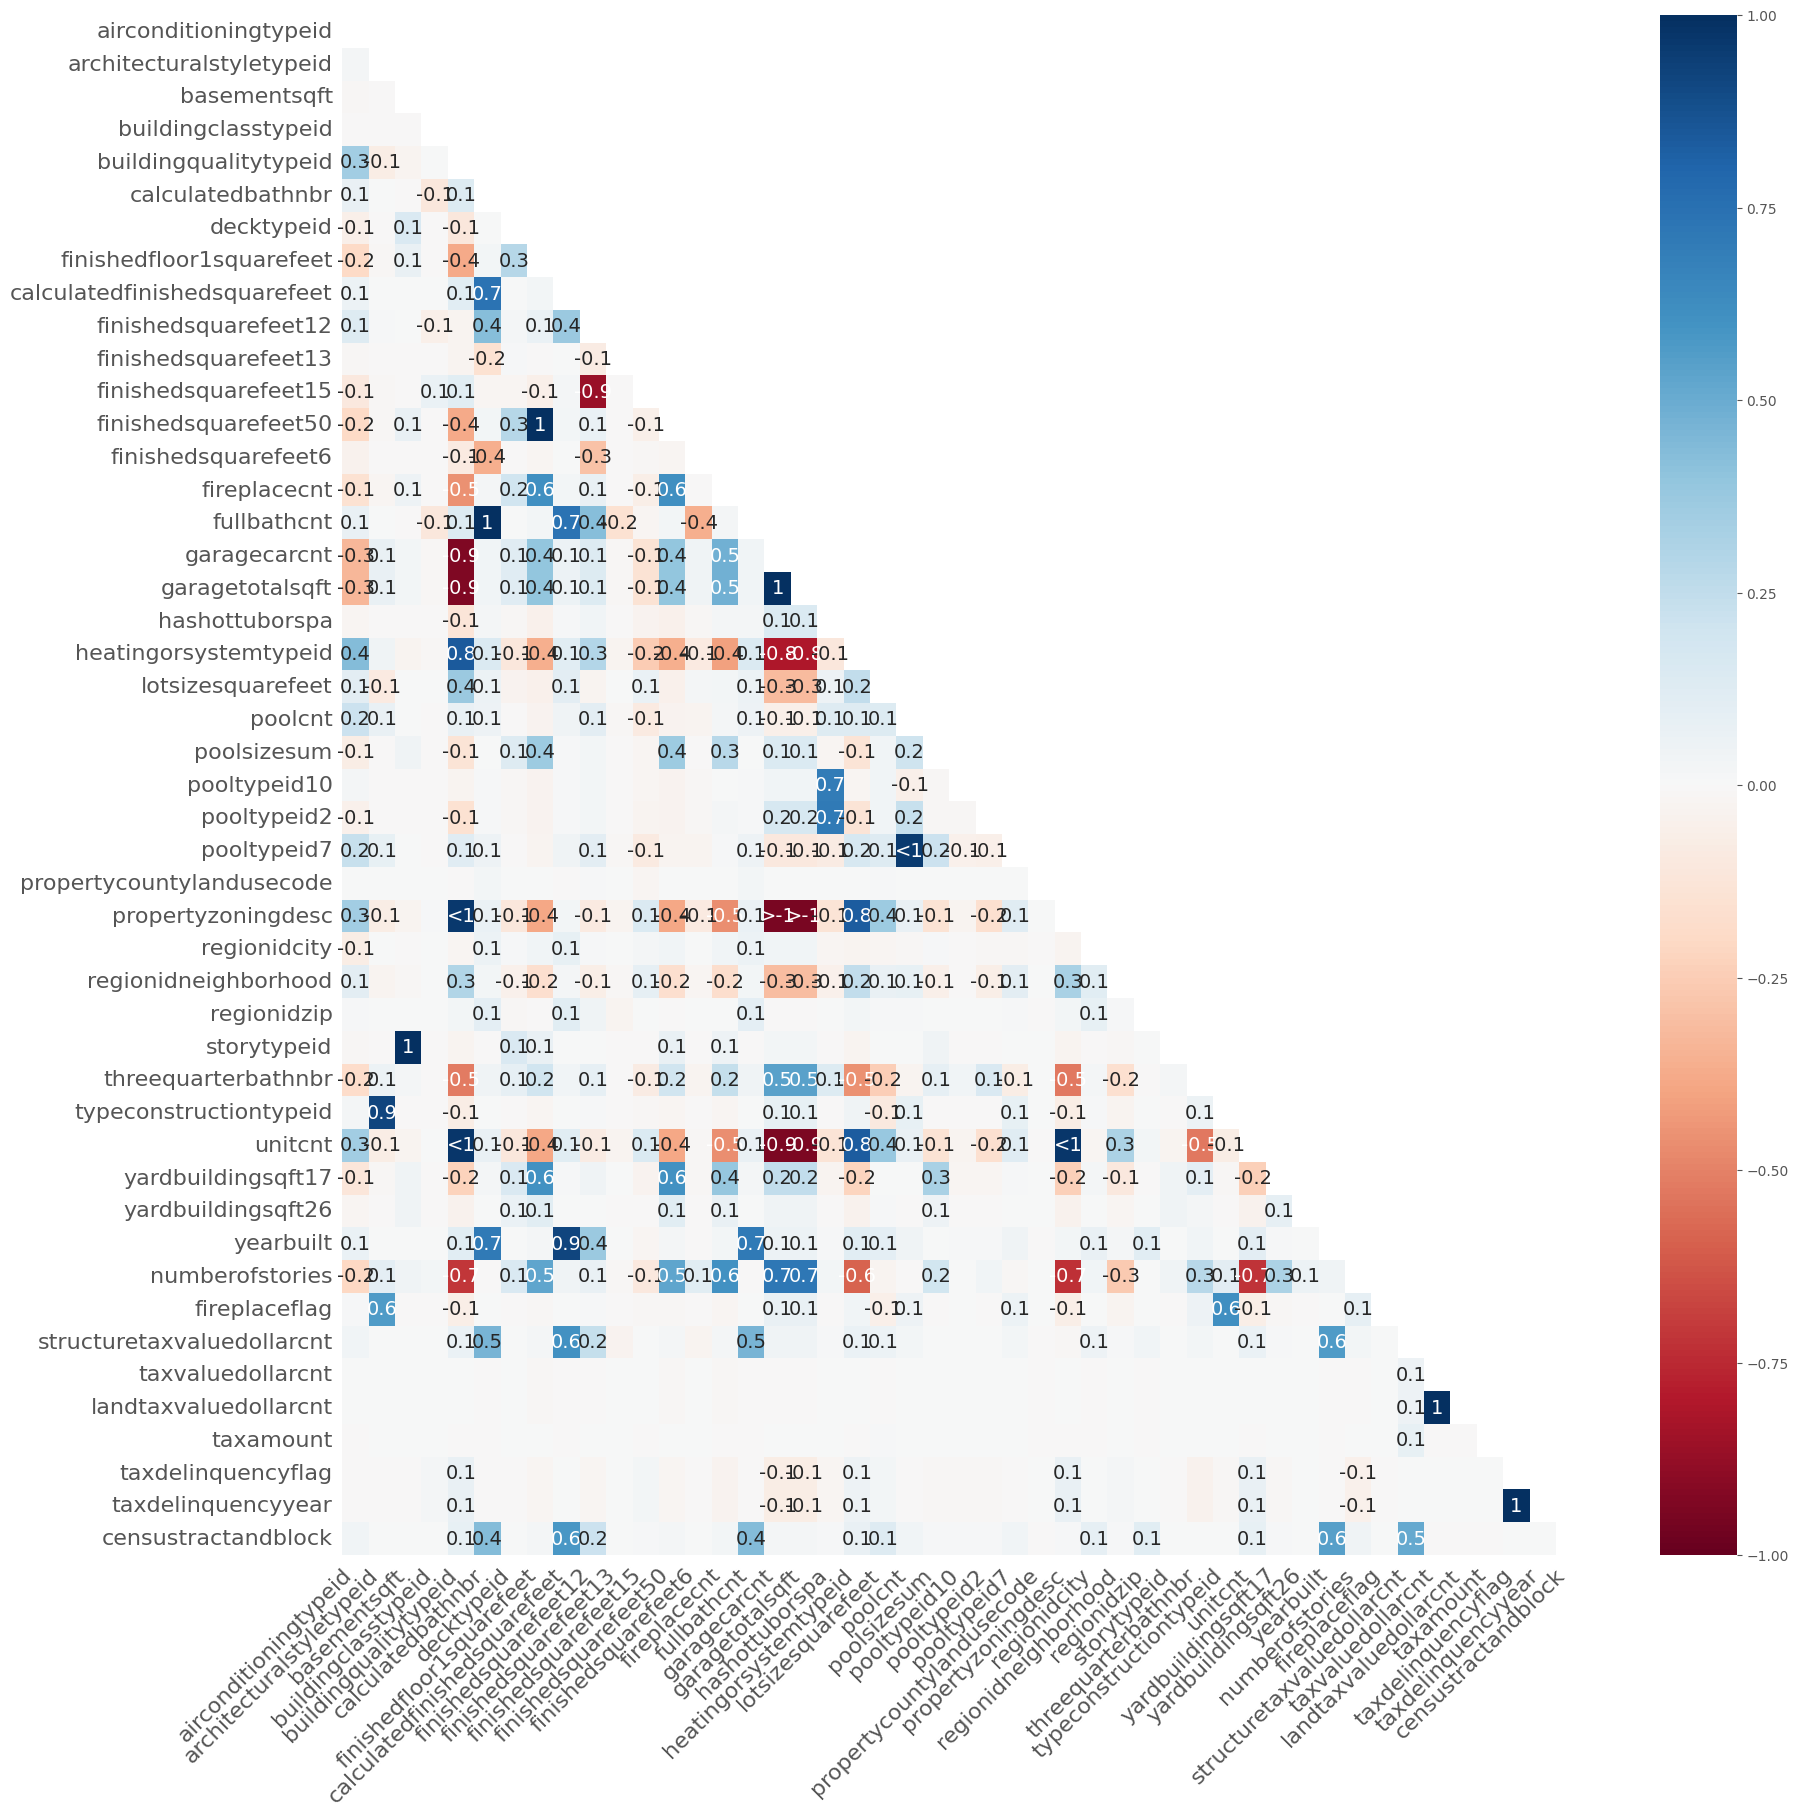

In [12]:
msno.heatmap(merged[missingValueColumns], figsize=(20,20))

### Top Features Selection

In [13]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [51]:
mergedFiltered = merged.fillna(-999)
print(mergedFiltered)

       parcelid  logerror transactiondate  airconditioningtypeid   
0      11016594    0.0276      2016-01-01                    1.0  \
1      14366692   -0.1684      2016-01-01                 -999.0   
2      12098116   -0.0040      2016-01-01                    1.0   
3      12643413    0.0218      2016-01-02                    1.0   
4      14432541   -0.0050      2016-01-02                 -999.0   
...         ...       ...             ...                    ...   
90270  10774160   -0.0356      2016-12-30                    1.0   
90271  12046695    0.0070      2016-12-30                 -999.0   
90272  12995401   -0.2679      2016-12-30                 -999.0   
90273  11402105    0.0602      2016-12-30                 -999.0   
90274  12566293    0.4207      2016-12-30                 -999.0   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt   
0                        -999.0        -999.0          2.0         3.0  \
1                        -999.0    

In [52]:
for f in mergedFiltered.columns:
    if mergedFiltered[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFiltered[f].values))
        mergedFiltered[f] = lbl.transform(list(mergedFiltered[f].values))
        print(mergedFiltered[f])

0        0
1        0
2        0
3        0
4        0
        ..
90270    0
90271    0
90272    0
90273    0
90274    0
Name: hashottuborspa, Length: 90275, dtype: int64
0         3
1        44
2         3
3        10
4        59
         ..
90270    10
90271     3
90272    29
90273    10
90274     3
Name: propertycountylandusecode, Length: 90275, dtype: int64
0         639
1           0
2        1521
3         615
4           0
         ... 
90270     626
90271     491
90272     417
90273     582
90274     210
Name: propertyzoningdesc, Length: 90275, dtype: int64
0         73
1        128
2         54
3        101
4         95
        ... 
90270     93
90271     79
90272     38
90273     95
90274     61
Name: yearbuilt, Length: 90275, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
90270    0
90271    0
90272    0
90273    0
90274    0
Name: fireplaceflag, Length: 90275, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
9027

In [53]:
mergedFiltered

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-999.0,-999.0,2.0,3.0,-999.0,4.0,...,-999.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,-999.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-999.0,-999.0,-999.0,3.5,4.0,-999.0,-999.0,...,-999.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-999.0,-9.990000e+02
2,12098116,-0.0040,2016-01-01,1.0,-999.0,-999.0,3.0,2.0,-999.0,4.0,...,-999.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,-999.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,...,-999.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,-999.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-999.0,-999.0,-999.0,2.5,4.0,-999.0,-999.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,-999.0,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,-999.0,-999.0,1.0,1.0,-999.0,4.0,...,-999.0,0,43800.0,191000.0,2015.0,147200.0,2495.24,0,-999.0,6.037132e+13
90271,12046695,0.0070,2016-12-30,-999.0,-999.0,-999.0,3.0,3.0,-999.0,4.0,...,-999.0,0,117893.0,161111.0,2015.0,43218.0,1886.54,0,-999.0,6.037301e+13
90272,12995401,-0.2679,2016-12-30,-999.0,-999.0,-999.0,2.0,4.0,-999.0,7.0,...,-999.0,0,22008.0,38096.0,2015.0,16088.0,1925.70,1,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,-999.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,...,-999.0,0,132991.0,165869.0,2015.0,32878.0,2285.57,0,-999.0,6.037601e+13


In [15]:
train_y = mergedFiltered.logerror.values
train_X = mergedFiltered.drop(["parcelid", "transactiondate", "logerror"], axis=1) #열 제거

In [54]:
train_y #logerror값

array([ 0.0276, -0.1684, -0.004 , ..., -0.2679,  0.0602,  0.4207])

In [55]:
train_X

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,1.0,-999.0,-999.0,2.0,3.0,-999.0,4.0,2.0,-999.0,-999.0,...,-999.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,-999.0,6.037107e+13
1,-999.0,-999.0,-999.0,3.5,4.0,-999.0,-999.0,3.5,-999.0,-999.0,...,-999.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-999.0,-9.990000e+02
2,1.0,-999.0,-999.0,3.0,2.0,-999.0,4.0,3.0,-999.0,-999.0,...,-999.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,-999.0,6.037464e+13
3,1.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,2.0,-999.0,-999.0,...,-999.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,-999.0,6.037296e+13
4,-999.0,-999.0,-999.0,2.5,4.0,-999.0,-999.0,2.5,-999.0,-999.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,-999.0,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,1.0,-999.0,-999.0,1.0,1.0,-999.0,4.0,1.0,-999.0,-999.0,...,-999.0,0,43800.0,191000.0,2015.0,147200.0,2495.24,0,-999.0,6.037132e+13
90271,-999.0,-999.0,-999.0,3.0,3.0,-999.0,4.0,3.0,-999.0,-999.0,...,-999.0,0,117893.0,161111.0,2015.0,43218.0,1886.54,0,-999.0,6.037301e+13
90272,-999.0,-999.0,-999.0,2.0,4.0,-999.0,7.0,2.0,-999.0,-999.0,...,-999.0,0,22008.0,38096.0,2015.0,16088.0,1925.70,1,14.0,6.037433e+13
90273,-999.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,2.0,-999.0,-999.0,...,-999.0,0,132991.0,165869.0,2015.0,32878.0,2285.57,0,-999.0,6.037601e+13


In [16]:
xgb_params = {
    'eta' : 0.05,
    'max_depth' : 8,
    'subsample' : 0.7,
    'colsample_bytree' : 0.7,
    'objective' : 'reg:linear',
    'eval_metric' : 'rmse',
    'silent' : 1
}

In [17]:
# kernel killed error
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)

In [18]:
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[01:55:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[01:55:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=8
[01:55:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=8
[01:55:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=8
[01:55:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[01:55:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=8
[01:55:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[01:55:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=8
[01:55:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nod

<Axes: xlabel='importance', ylabel='features'>

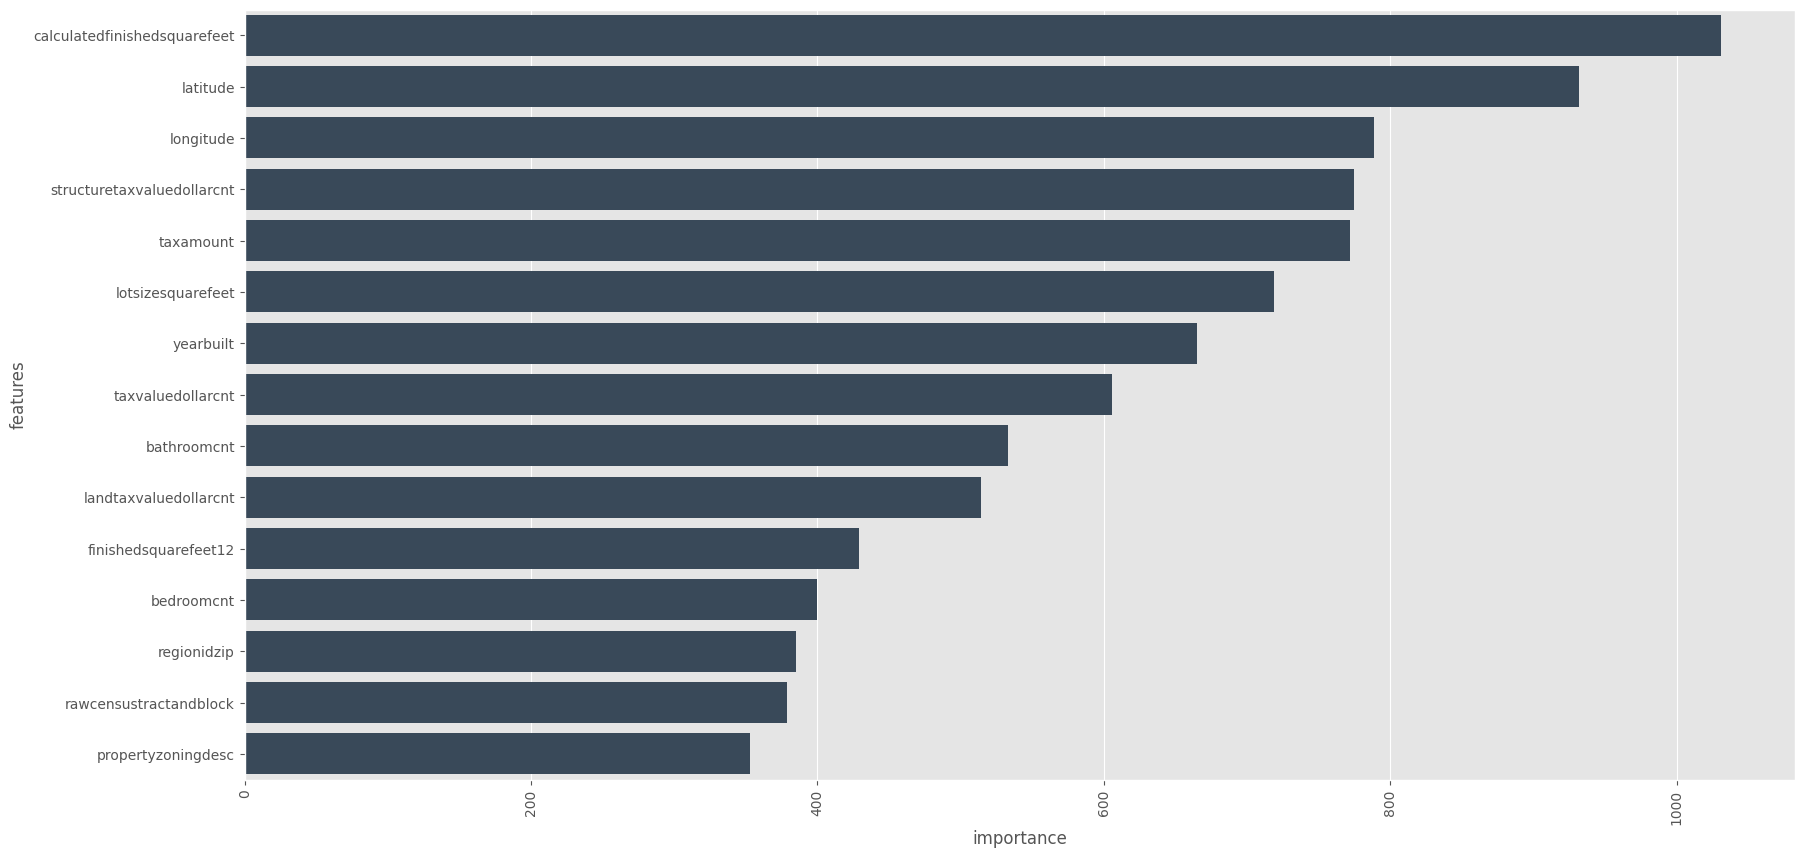

In [40]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'], ascending=False, inplace=True) #importance값 기준으로 정렬함
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15), x="importance", y="features", ax=ax, orient="h", color="#34495e")

In [58]:
featureImportance

{'taxamount': 772,
 'yearbuilt': 665,
 'calculatedfinishedsquarefeet': 1031,
 'taxvaluedollarcnt': 606,
 'finishedsquarefeet50': 30,
 'taxdelinquencyflag': 52,
 'garagecarcnt': 76,
 'latitude': 932,
 'bathroomcnt': 533,
 'bedroomcnt': 400,
 'propertyzoningdesc': 353,
 'landtaxvaluedollarcnt': 514,
 'heatingorsystemtypeid': 64,
 'storytypeid': 3,
 'regionidneighborhood': 235,
 'buildingqualitytypeid': 166,
 'regionidzip': 385,
 'propertycountylandusecode': 167,
 'longitude': 789,
 'taxdelinquencyyear': 82,
 'propertylandusetypeid': 102,
 'finishedsquarefeet6': 68,
 'poolcnt': 71,
 'unitcnt': 48,
 'finishedsquarefeet15': 202,
 'finishedsquarefeet12': 429,
 'structuretaxvaluedollarcnt': 775,
 'finishedsquarefeet13': 10,
 'censustractandblock': 181,
 'lotsizesquarefeet': 719,
 'buildingclasstypeid': 32,
 'basementsqft': 21,
 'airconditioningtypeid': 178,
 'rawcensustractandblock': 379,
 'regionidcity': 257,
 'finishedfloor1squarefeet': 86,
 'hashottuborspa': 17,
 'pooltypeid7': 13,
 'archi

In [59]:
features

,features,importance
2,calculatedfinishedsquarefeet,1031
7,latitude,932
18,longitude,789
26,structuretaxvaluedollarcnt,775
0,taxamount,772
29,lotsizesquarefeet,719
1,yearbuilt,665
3,taxvaluedollarcnt,606
8,bathroomcnt,533
11,landtaxvaluedollarcnt,514


### Correlation Analysis

In [1]:
# topFeatures = features["features"].tolist()[:20]
# corrMatt = merged[topFeatures].corr()
# mask = np.array(corrMatt)
# mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

### Multicollinearity Analysis
다중 회귀 모델의 하나 의 예측 변수가 상당한 정확도로 다른 변수로부터 선형으로 예측될 수 있는 현상

[Text(0.5, 0, 'VIF Scores'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

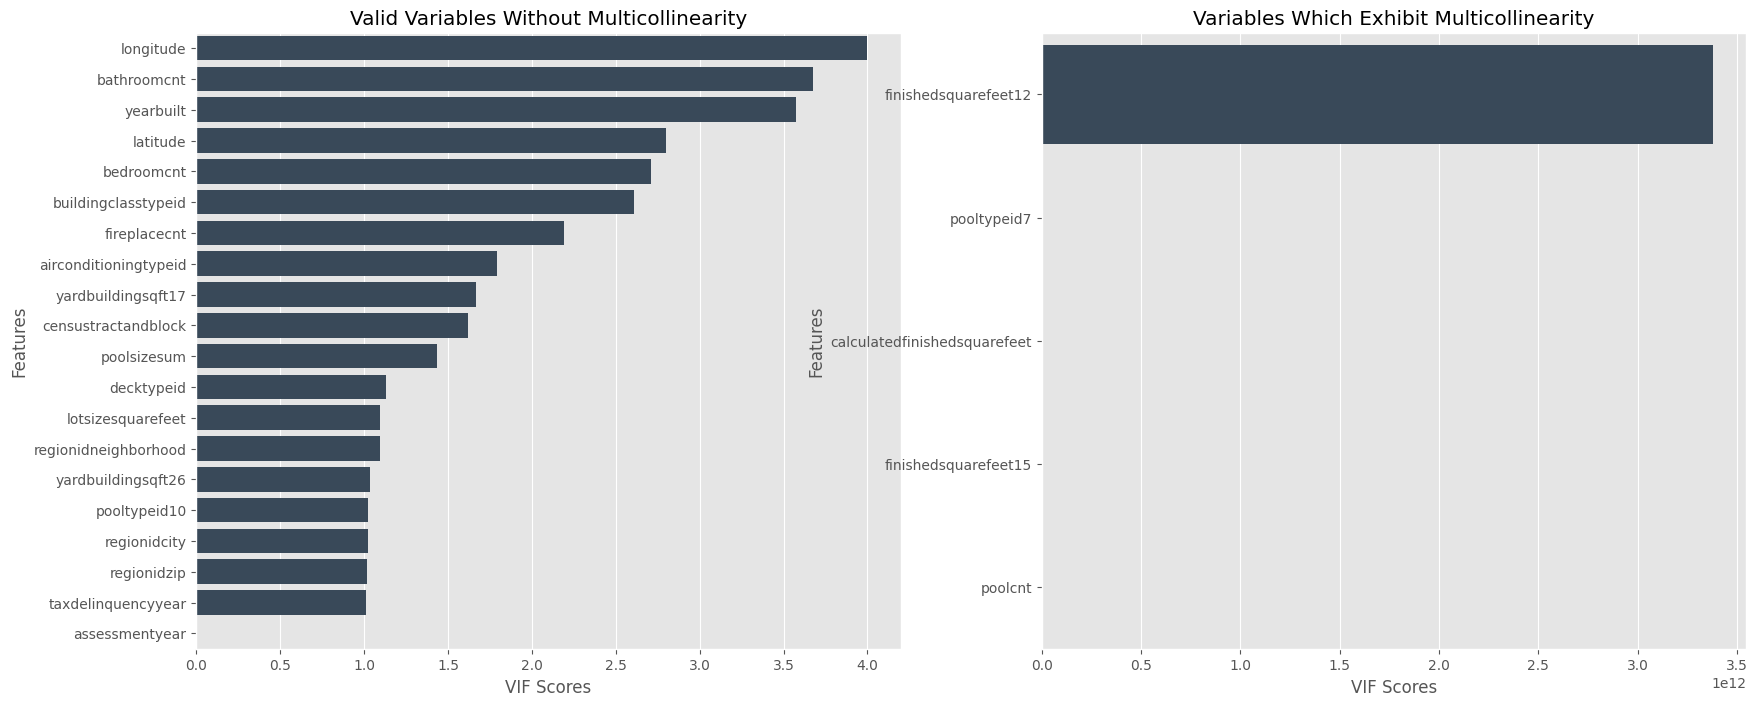

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in merged.columns:
    #print (f)
    if merged[f].dtype!='object' and f not in ["parcelid", "transactiondate", "logerror"]:
        numericalCol.append(f) # column명 불러오기
mergedFilterd = merged[numericalCol].fillna(-999) # NaN값 -999로 채우기
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sn.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sn.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [60]:
numericalCol

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollar

In [63]:
mergedFiltered

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-999.0,-999.0,2.0,3.0,-999.0,4.0,...,-999.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,-999.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-999.0,-999.0,-999.0,3.5,4.0,-999.0,-999.0,...,-999.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-999.0,-9.990000e+02
2,12098116,-0.0040,2016-01-01,1.0,-999.0,-999.0,3.0,2.0,-999.0,4.0,...,-999.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,-999.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,...,-999.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,-999.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-999.0,-999.0,-999.0,2.5,4.0,-999.0,-999.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,-999.0,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,-999.0,-999.0,1.0,1.0,-999.0,4.0,...,-999.0,0,43800.0,191000.0,2015.0,147200.0,2495.24,0,-999.0,6.037132e+13
90271,12046695,0.0070,2016-12-30,-999.0,-999.0,-999.0,3.0,3.0,-999.0,4.0,...,-999.0,0,117893.0,161111.0,2015.0,43218.0,1886.54,0,-999.0,6.037301e+13
90272,12995401,-0.2679,2016-12-30,-999.0,-999.0,-999.0,2.0,4.0,-999.0,7.0,...,-999.0,0,22008.0,38096.0,2015.0,16088.0,1925.70,1,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,-999.0,-999.0,-999.0,2.0,2.0,-999.0,4.0,...,-999.0,0,132991.0,165869.0,2015.0,32878.0,2285.57,0,-999.0,6.037601e+13


In [64]:
vifDict

{'airconditioningtypeid': 1.791656281649892,
 'architecturalstyletypeid': 6.493447382734724,
 'basementsqft': 16.977136590851146,
 'bathroomcnt': 3.674485166446638,
 'bedroomcnt': 2.70955904870399,
 'buildingclasstypeid': 2.6092173123513107,
 'buildingqualitytypeid': 25.359959015229983,
 'calculatedbathnbr': 38818230.164727196,
 'decktypeid': 1.1303534689658508,
 'finishedfloor1squarefeet': 340.9551578035824,
 'calculatedfinishedsquarefeet': 5528507523.036058,
 'finishedsquarefeet12': 3377277560832.768,
 'finishedsquarefeet13': 252225066.3309245,
 'finishedsquarefeet15': 2653624975.61824,
 'finishedsquarefeet50': 327.819991417842,
 'finishedsquarefeet6': 718515353.3084472,
 'fips': 11947.005163367987,
 'fireplacecnt': 2.1928630989847937,
 'fullbathcnt': 37018509.37434067,
 'garagecarcnt': 39.75272679415996,
 'garagetotalsqft': 33.038847563911276,
 'heatingorsystemtypeid': 8.090615665696543,
 'latitude': 2.8001360506207464,
 'longitude': 3.9988814058936986,
 'lotsizesquarefeet': 1.09497

### Univariate Analysis

[Text(0.5, 0, 'logerror'),
 Text(0, 0.5, 'VIF Score'),
 Text(0.5, 1.0, 'Distribution Of Dependent Variable')]

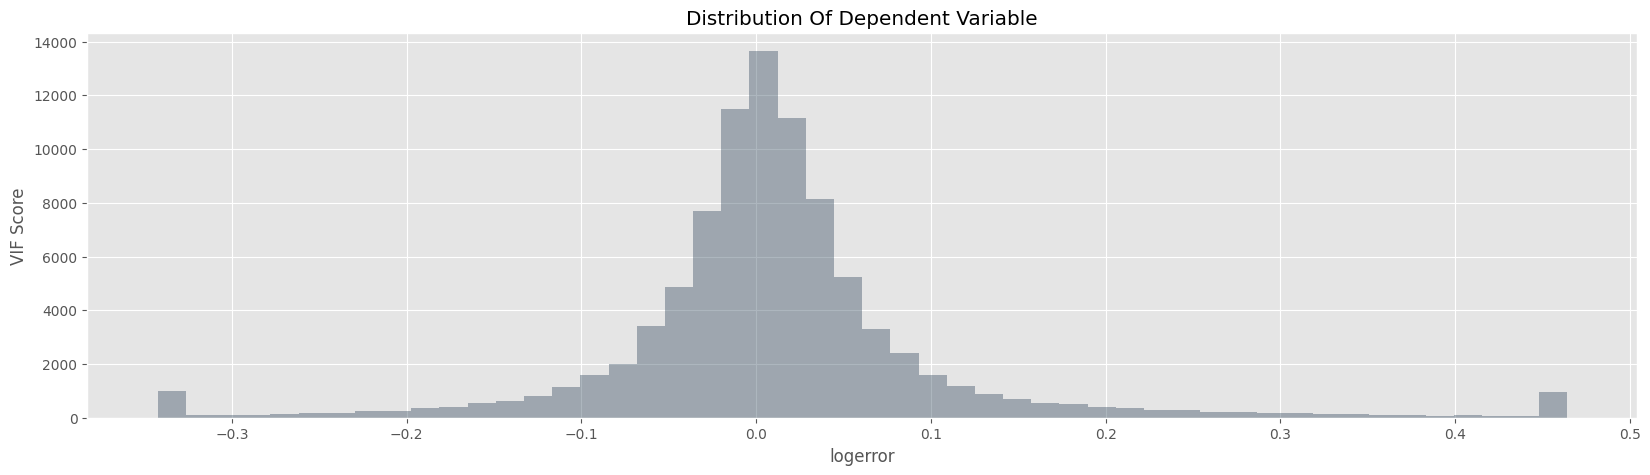

In [23]:
ulimit = np.percentile(merged.logerror.values, 99)
llimit = np.percentile(merged.logerror.values, 1)
# merged['logerror'].ix[merged['logerror']>ulimit] = ulimit
# merged['logerror'].ix[merged['logerror']<llimit] = llimit
merged.loc[merged['logerror'] > ulimit, 'logerror'] = ulimit
merged.loc[merged['logerror'] < llimit, 'logerror'] = llimit

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.distplot(merged.logerror.values, bins=50,kde=False,color="#34495e",ax=ax)
ax.set(xlabel='logerror', ylabel='VIF Score',title="Distribution Of Dependent Variable")

In [65]:
ulimit

5425.309999999998

In [66]:
llimit

649.0

[Text(0.5, 0, 'Month Of The Year'),
 Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 1.0, 'No Of Occurunces Across Month In 2016'),
 None]

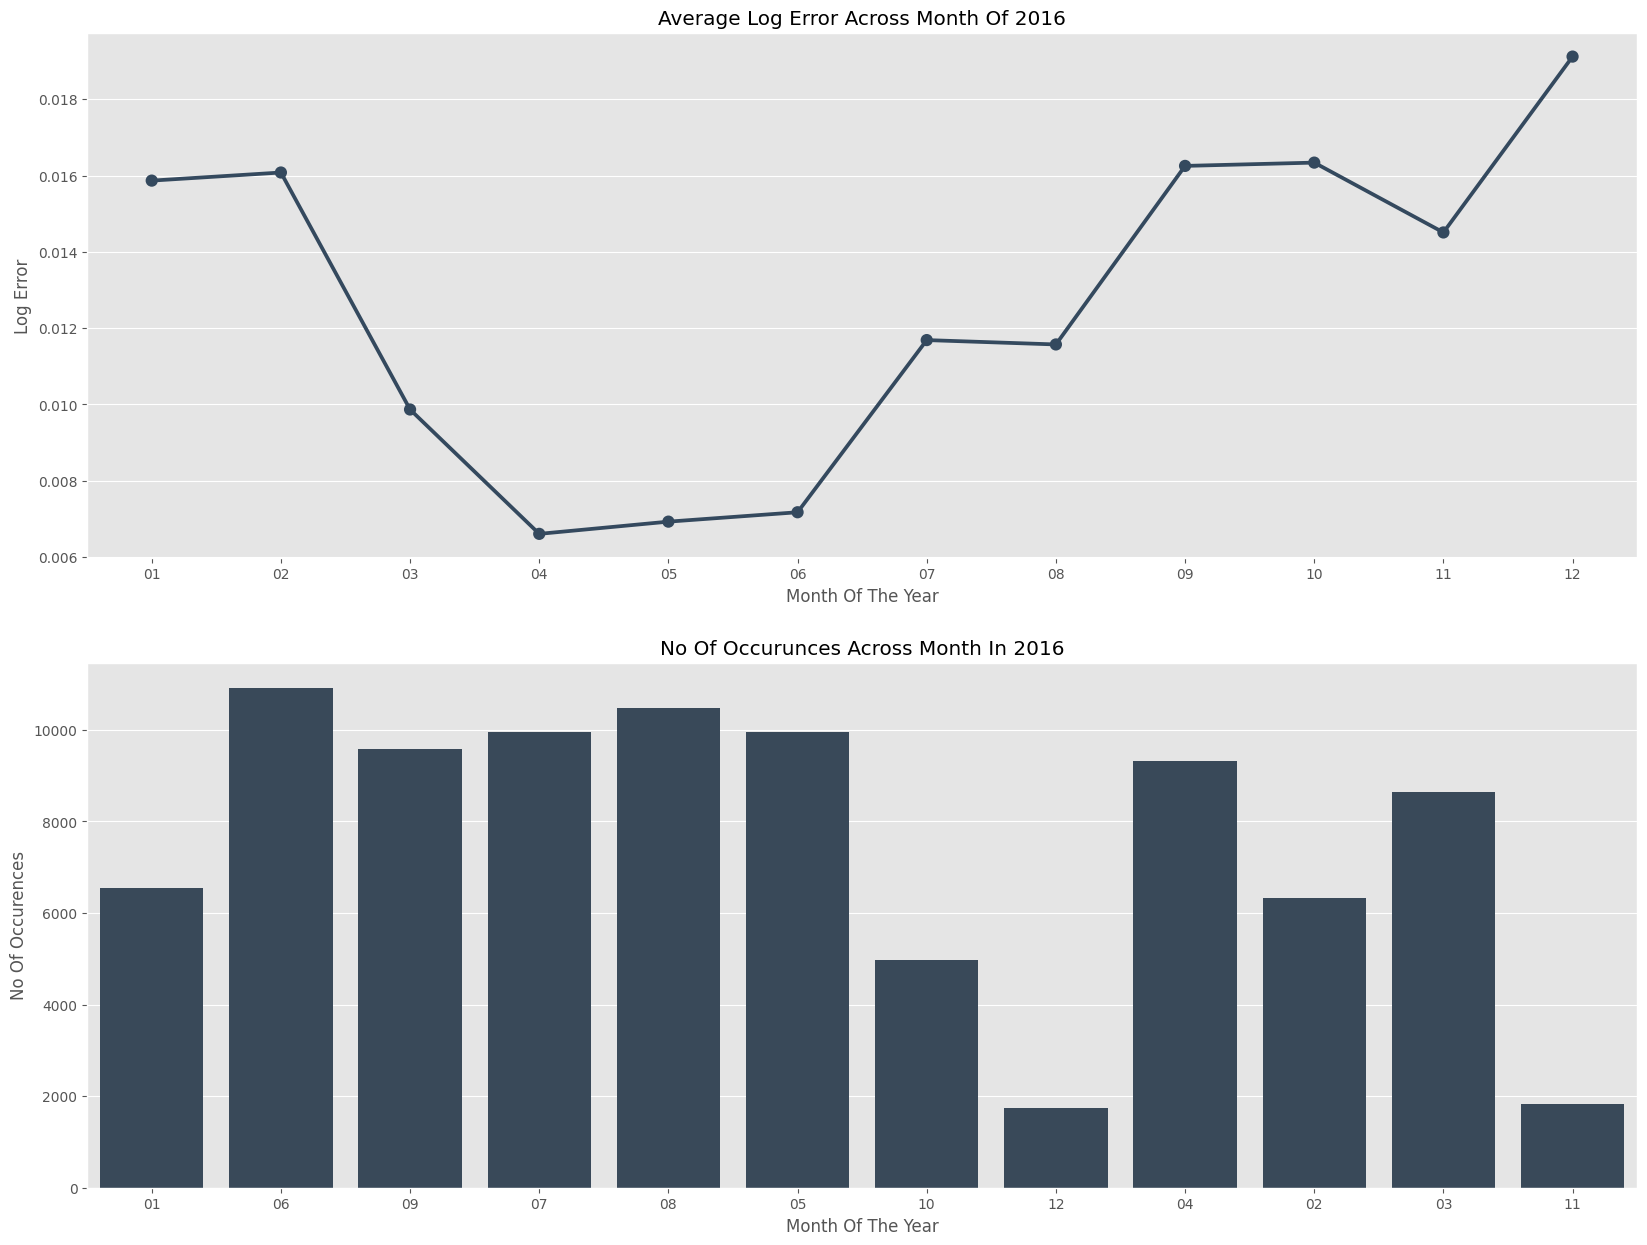

In [24]:
train["year"] = train.transactiondate.map(lambda x: str(x).split("-")[0])
train["month"] = train.transactiondate.map(lambda x: str(x).split("-")[1])
train["day"] = train.transactiondate.map(lambda x: str(x).split("-")[2].split()[0])

traingroupedMonth = train.groupby(["month"])["logerror"].mean().to_frame().reset_index()
traingroupedDay = train.groupby(["day"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sn.pointplot(x=traingroupedMonth["month"], y=traingroupedMonth["logerror"], data=traingroupedMonth, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='Log Error',title="Average Log Error Across Month Of 2016",label='big')

sn.countplot(x=train["month"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2016",label='big')

[Text(0.5, 0, 'Day Of The Month'),
 Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 1.0, 'No Of Occurences Across Days Of The Month In 2016'),
 None]

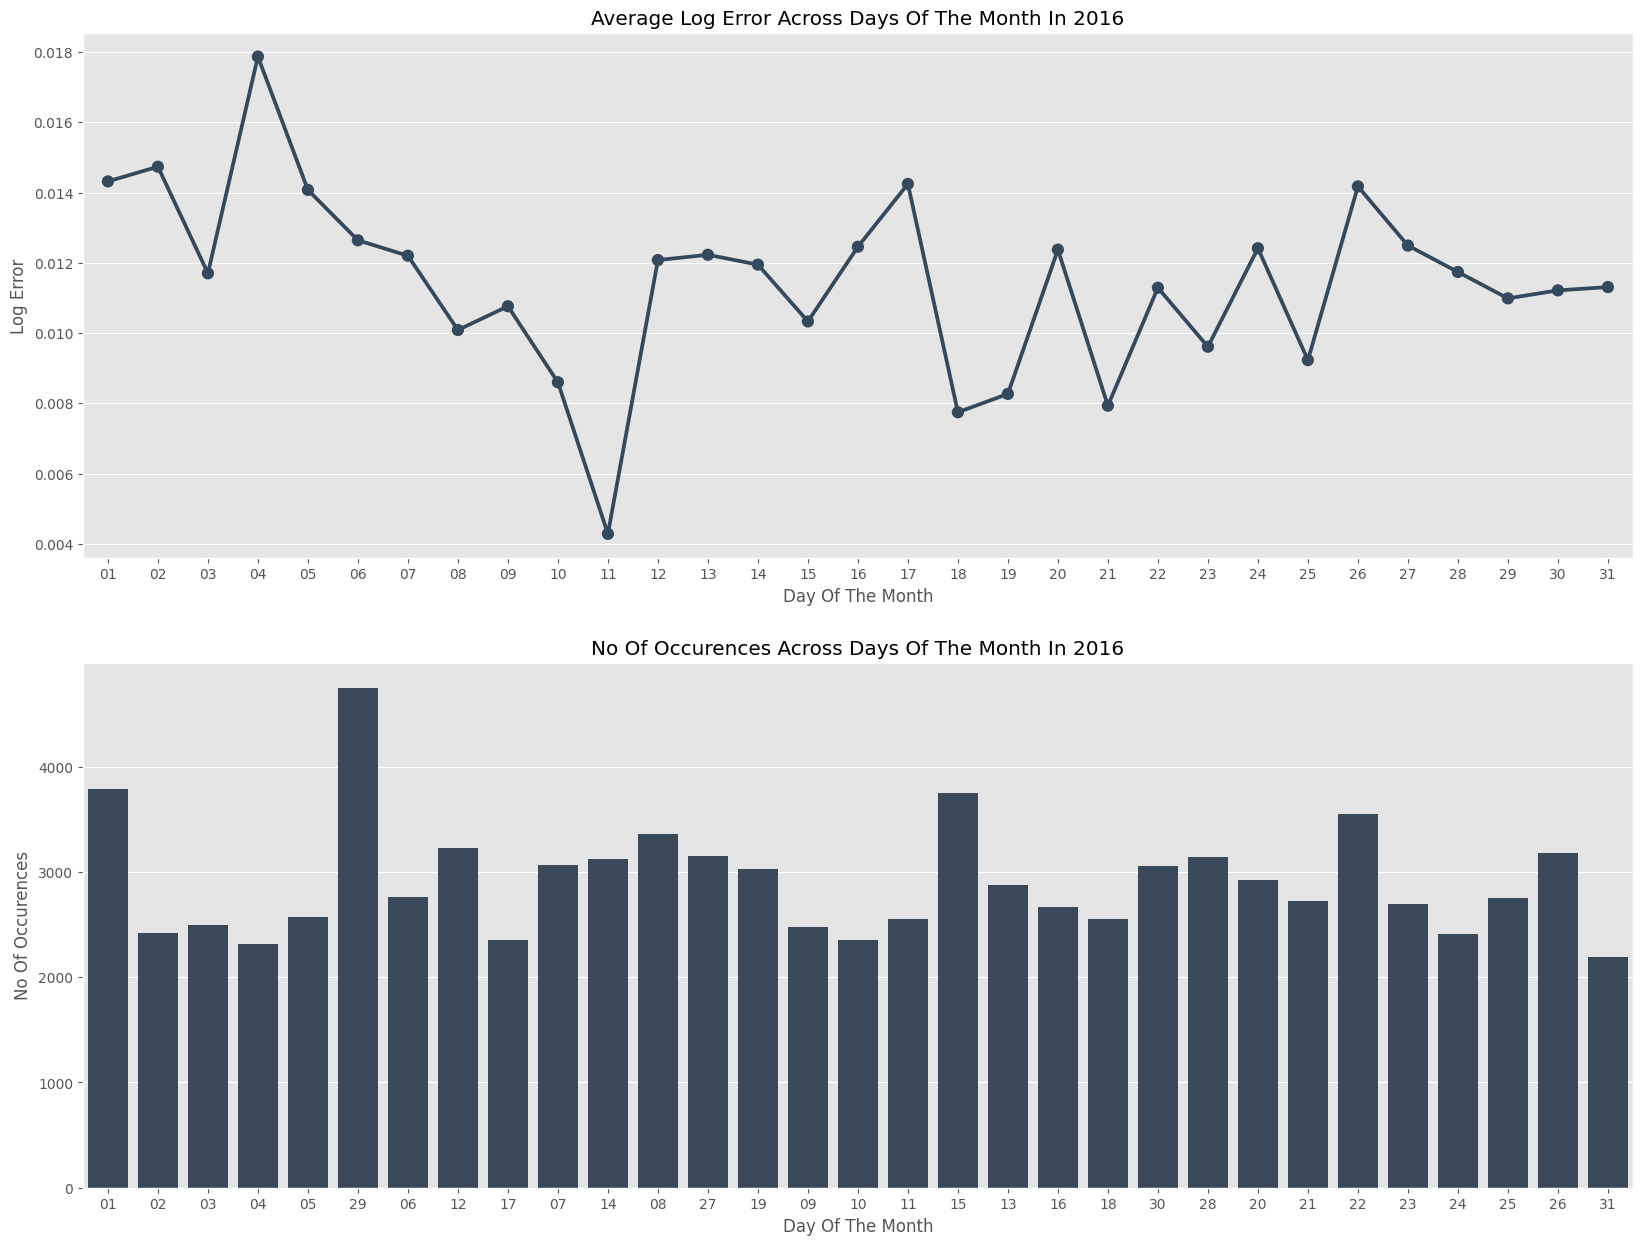

In [25]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)

sn.pointplot(x=traingroupedDay["day"], y=traingroupedDay["logerror"], data=traingroupedDay, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Day Of The Month', ylabel='Log Error',title="Average Log Error Across Days Of The Month In 2016",label='big')

sn.countplot(x=train["day"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Day Of The Month', ylabel='No Of Occurences',title="No Of Occurences Across Days Of The Month In 2016",label='big')

<Axes: xlabel='yearbuilt'>

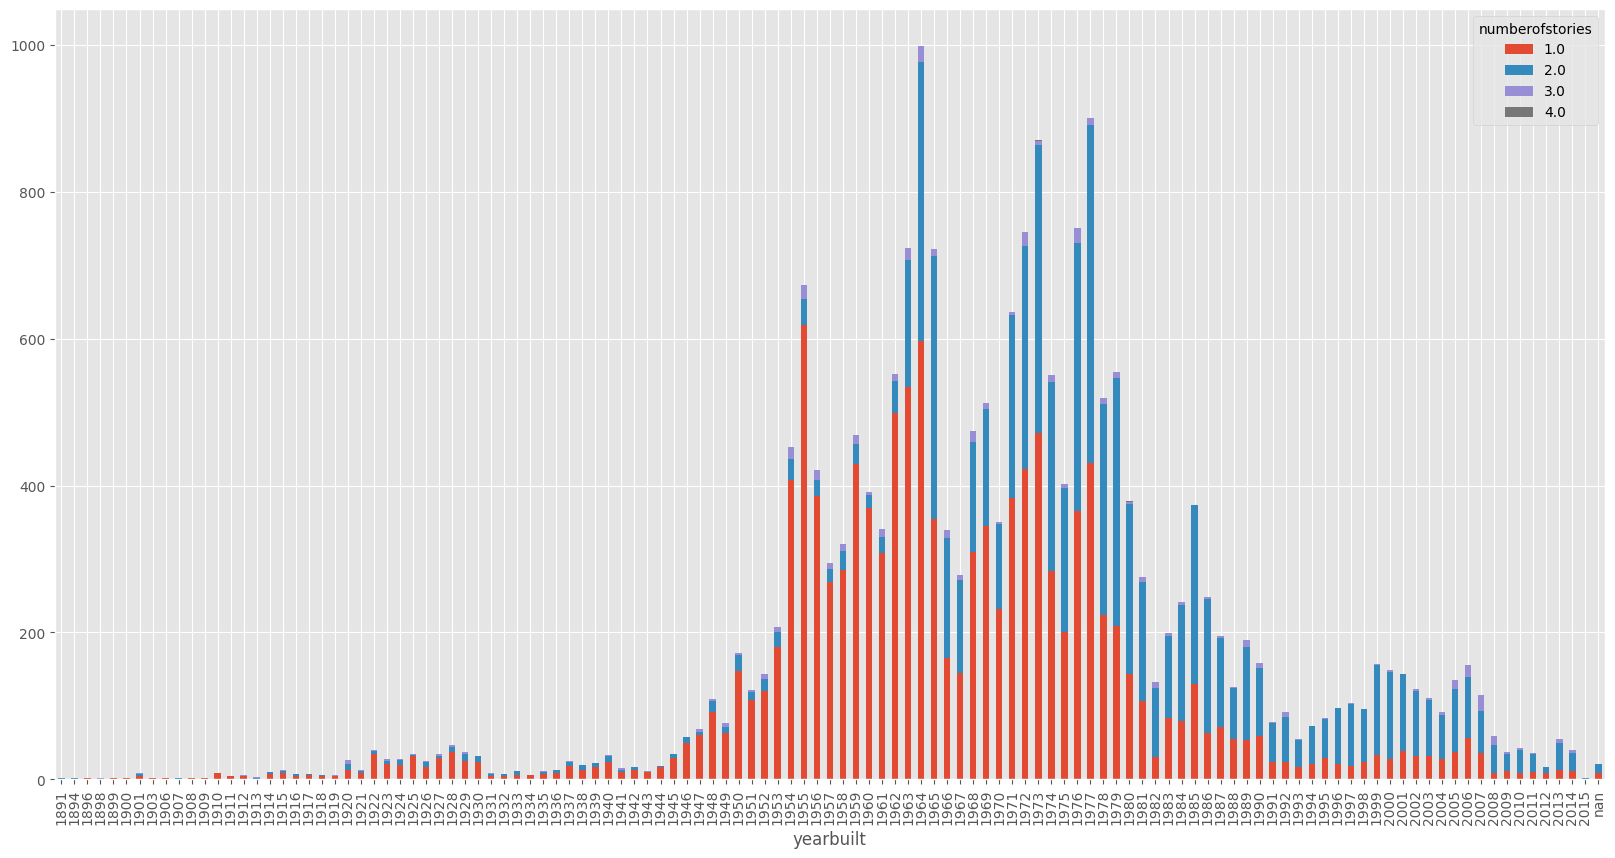

In [26]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
merged["yearbuilt"] = merged["yearbuilt"].map(lambda x:str(x).split(".")[0])
yearMerged = merged.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged.plot(kind='bar', stacked=True,ax=ax1)

In [29]:
cols = ["bathroomcnt","bedroomcnt","roomcnt","numberofstories","logerror","calculatedfinishedsquarefeet"]
mergedFiltered = merged[cols].dropna()
for col in cols:
    ulimit = np.percentile(mergedFiltered[col].values, 99.5)
    llimit = np.percentile(mergedFiltered[col].values, 0.5)
    # mergedFiltered[col].ix[mergedFiltered[col]>ulimit] = ulimit
    # mergedFiltered[col].ix[mergedFiltered[col]<llimit] = llimit
    mergedFiltered.loc[mergedFiltered[col]>ulimit, col] = ulimit
    mergedFiltered.loc[mergedFiltered[col]<llimit, col] = llimit

### Calculated Finished Square Feet Vs Log Error

In [2]:
# plt.figure(figsize=(8,8))
# sn.jointplot(x=mergedFiltered.calculatedfinishedsquarefeet.values, y=mergedFiltered.logerror.values, size=10,kind="hex",color="#34495e")
# plt.ylabel('Log Error', fontsize=12)
# plt.xlabel('Calculated Finished Square Feet', fontsize=12)
# plt.show()

### Bedroom Count Vs Log Error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bedroom Count'),
 Text(0.5, 1.0, 'Bedroom Count Vs Log Error')]

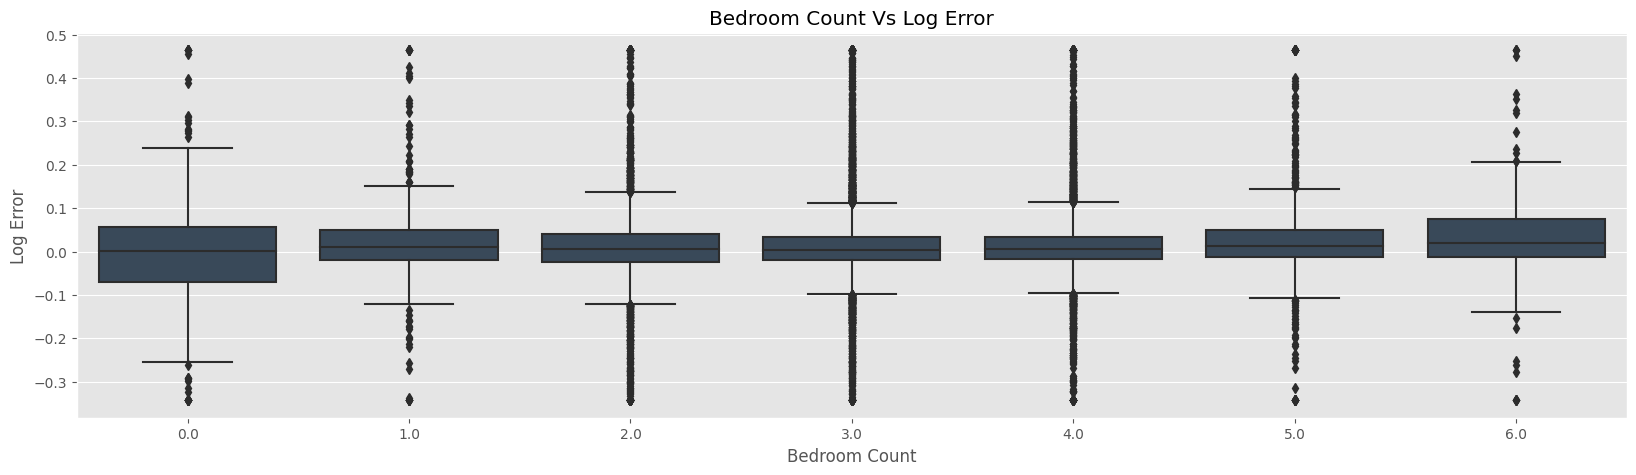

In [31]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="bedroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bedroom Count",title="Bedroom Count Vs Log Error")

### Bathroom Count Vs Log Error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bathroom Count'),
 Text(0.5, 1.0, 'Bathroom Count Vs Log Error')]

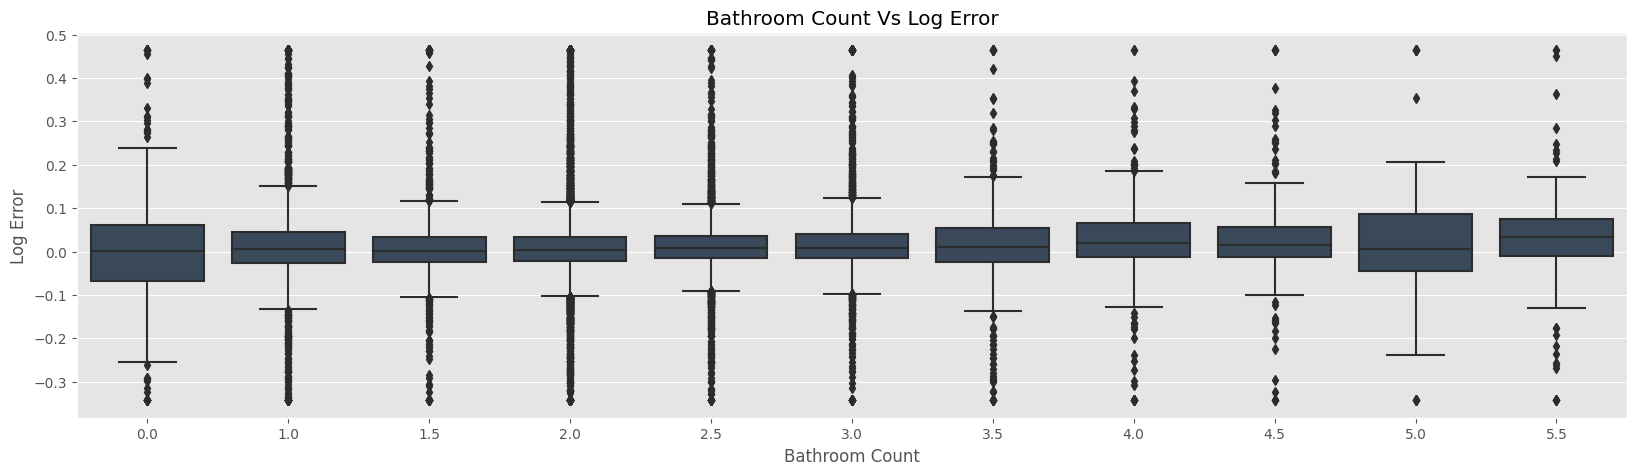

In [32]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="bathroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bathroom Count",title="Bathroom Count Vs Log Error")

### Room Count Vs Log Error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Room Count'),
 Text(0.5, 1.0, 'Room Count Vs Log Error')]

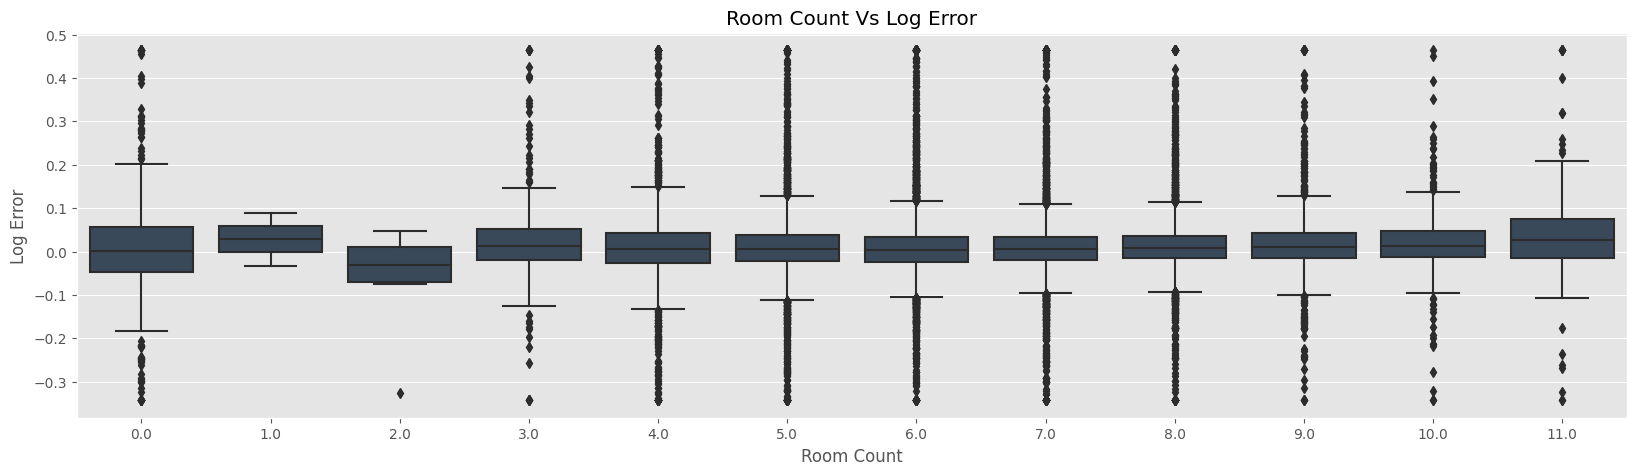

In [33]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="roomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Room Count",title="Room Count Vs Log Error")

### No Of Storeys Vs Log Error

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'No Of Storeys'),
 Text(0.5, 1.0, 'No Of Storeys Vs Log Error')]

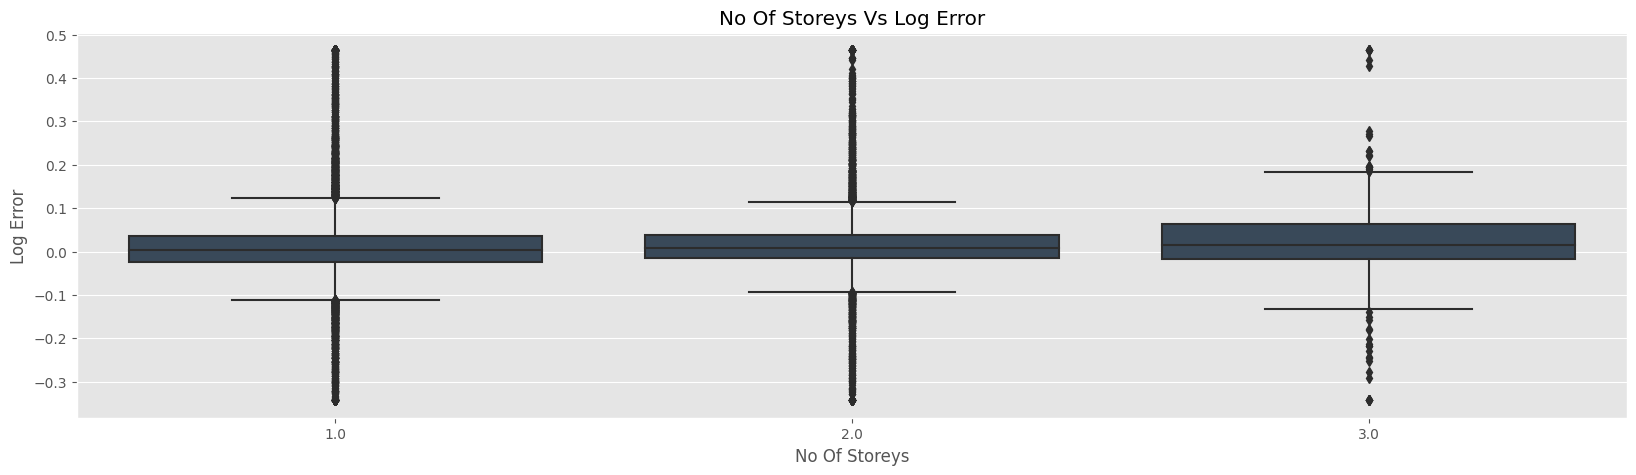

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="numberofstories", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="No Of Storeys",title="No Of Storeys Vs Log Error")

### Bedroom Vs Bathroom Vs Log Error

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure()
fig.set_size_inches(20,10)
ax = Axes3D(fig)

ax.scatter(mergedFiltered.bathroomcnt, mergedFiltered.bedroomcnt, mergedFiltered.logerror,color="#34495e")
ax.set_xlabel('Bathroom Count')
ax.set_ylabel('Bedroom Count')
ax.set_zlabel('Log Error');
pyplot.show()

<Figure size 2000x1000 with 0 Axes>